**Text identification using OpenCV, Tesseract (OCR) and deep neural network**

In [1]:
!pip install opencv-python
!pip install pytesseract
!apt install tesseract-ocr
!pip install tensorflow



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [17]:
from google.colab import files
uploaded = files.upload()


Saving Image-2.jpg to Image-2.jpg


In [20]:
import cv2
import pytesseract
from matplotlib import pyplot as plt
import numpy as np

# ✅ Set path to tesseract (Windows only, update if installed in different path)
# pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"




In [ ]:
# Load image
image = cv2.imread("Image-2.jpg")  
if image is None:
    raise FileNotFoundError("Image not found. Check the path!")

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Resize for better OCR (optional, useful for small text)
scale_percent = 150  # enlarge by 1.5x
width = int(gray.shape[1] * scale_percent / 100)
height = int(gray.shape[0] * scale_percent / 100)
gray = cv2.resize(gray, (width, height), interpolation=cv2.INTER_CUBIC)

# Denoise + Threshold (Otsu works better for mixed backgrounds)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Morphology (to strengthen characters)
kernel = np.ones((2, 2), np.uint8)
processed = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)


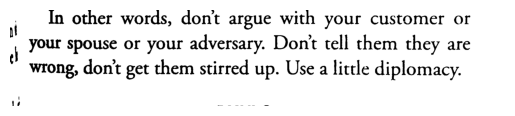

📜 Extracted Text:

i In other words, dont argue with your customer or
, Your spouse or your adversary. Don't tell them they are
" wrong, don’t get them stirred up. Use a little diplomacy.



In [22]:
# Show processed image
plt.imshow(processed, cmap="gray")
plt.axis("off")
plt.show()

# OCR Config
custom_config = r'--oem 3 --psm 6'  # LSTM, assume block of text
text = pytesseract.image_to_string(processed, config=custom_config)

print("📜 Extracted Text:\n")
print(text)
